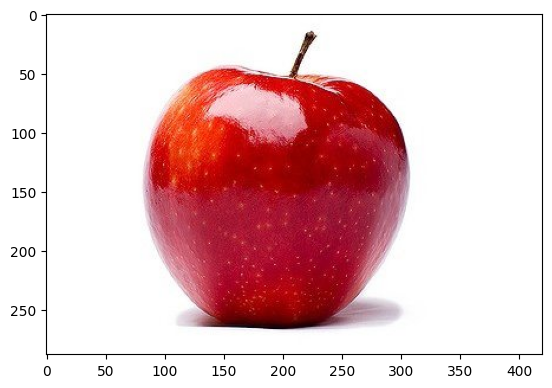

In [54]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image_path = './data/apple.jpeg'

image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.imshow(image)
plt.show()

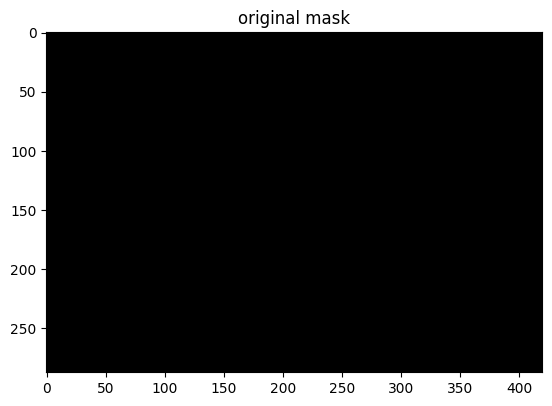

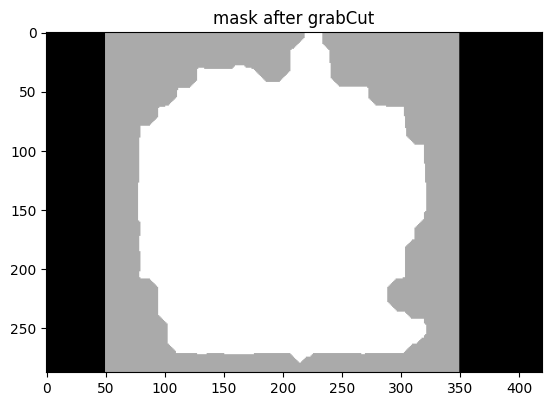

~~~~~~~~~~~~~~~~~~~~~~~mask after grabCut
 [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
~~~~~~~~~~~~~~~~~~~~~~~np.unique(mask)

[0 2 3]


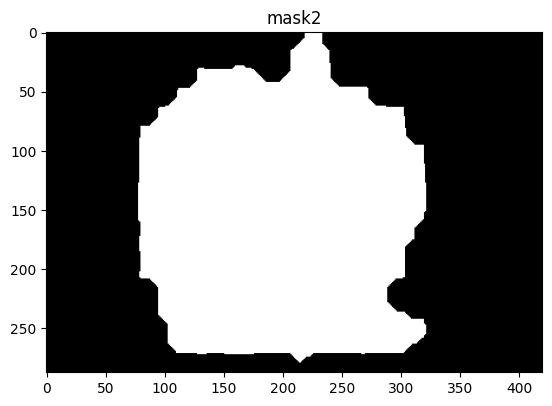

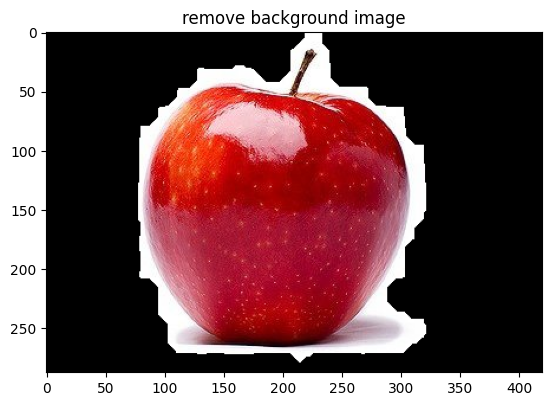

In [55]:
rectangle = (50, 0, 300, 300) # rectangle = (0, 0, 399, 1000)을 이걸로 고침

mask = np.zeros(image.shape[:2], np.uint8)

plt.imshow(mask, 'gray')
plt.title('original mask')
plt.show()

bgdModel = np.zeros((1, 65), np.float64)
fgdModel = np.zeros((1, 65), np.float64)

cv2.grabCut(image,
            mask,
            rectangle, 
              # ROI containing the foreground object in the format (x,y,w,h). The pixels outside of the ROI are marked as "obvious background".
            bgdModel,
            fgdModel,
            5,
            cv2.GC_INIT_WITH_RECT)

plt.imshow(mask, 'gray')
plt.title('mask after grabCut')
plt.show()

print("~~~~~~~~~~~~~~~~~~~~~~~mask after grabCut\n", mask)
print("~~~~~~~~~~~~~~~~~~~~~~~np.unique(mask)\n")
print(np.unique(mask))

mask2 = np.where((mask == 2) | (mask == 0), 0, 1).astype('uint8')

plt.imshow(mask2, 'gray')
plt.title('mask2')
plt.show()

image_rgb_nobg = image * mask2[:, :, np.newaxis]

plt.imshow(image_rgb_nobg)
plt.title('remove background image')
plt.show()

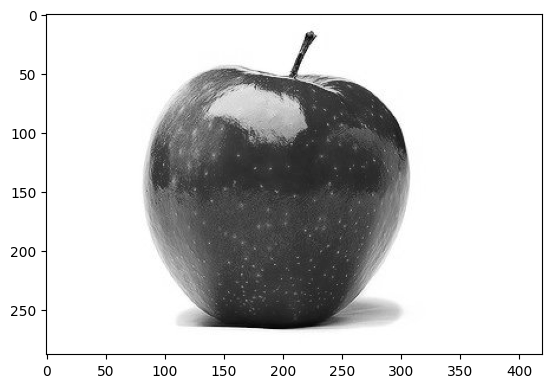

[[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]]
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 

In [56]:
imageg = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

plt.imshow(imageg, 'gray')
plt.show()

print(imageg)
print(np.unique(imageg))

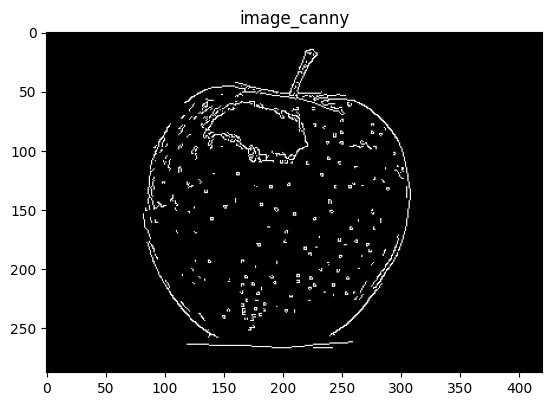

In [57]:
median_intensity = np.median(imageg)

lower_thre = int(max(0, (1.0 - 0.33) * median_intensity))
upper_thre = int(min(255, (1.0 + 0.33) * median_intensity))

image_canny = cv2.Canny(imageg, lower_thre, upper_thre)

plt.imshow(image_canny, 'gray')
plt.title('image_canny')
plt.show()

In [58]:
median_intensity

255.0